In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

In [4]:
test_df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


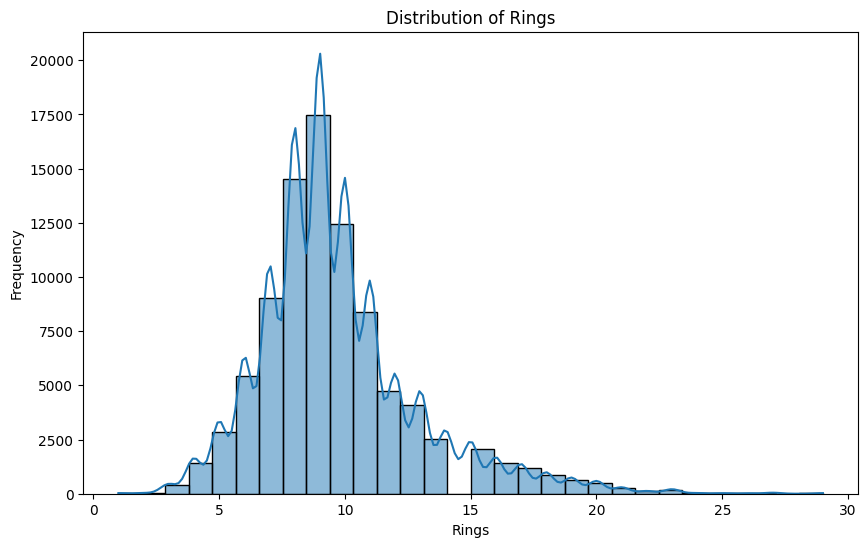

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Rings'], bins=30, kde=True)
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])

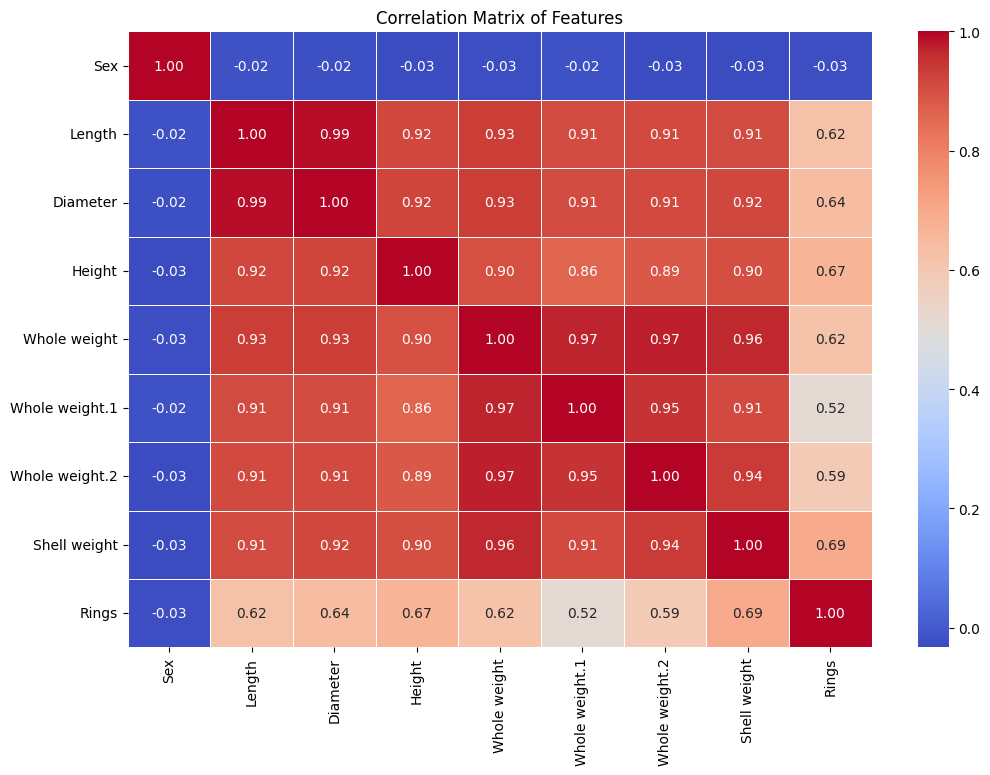

In [7]:
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.drop('id', axis=1).corr()  # Assuming 'id' is not a useful feature for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmsle(y_actual, y_predicted):
    log_actual = np.log1p(y_actual)
    log_predicted = np.log1p(y_predicted)
    return np.sqrt(np.mean(np.square(log_predicted - log_actual)))

# Load and prepare data
X = train_df.drop(['id', 'Rings'], axis=1)
y = train_df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the ensemble components
base_learners = [
    ('gb', GradientBoostingRegressor(n_estimators=400, learning_rate=0.01, max_depth=9, min_samples_split=2, min_samples_leaf=2, max_features='log2')),
    ('rf', RandomForestRegressor(n_estimators=435, max_depth=8, min_samples_split=7, min_samples_leaf=1, max_features='auto')),
    ('svm', SVR())
]

# Set up the ensemble model
ensemble_model = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression(), cv=3)

# Train the model
ensemble_model.fit(X_train, y_train)

# Evaluate the model
predictions = ensemble_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


# Calculate and display RMSLE
error_rmsle = calculate_rmsle(y_test, predictions)
print(f"Root Mean Squared Logarithmic Error: {error_rmsle}")


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean Squared Error: 3.3698742766018994
Root Mean Squared Logarithmic Error: 0.14893957369188993


In [9]:
# Check if 'id' column exists
if 'id' in test_df.columns:
    X_test_new = test_df.drop(['id'], axis=1)  # Drop 'id' column, keeping only features
    ids = test_df['id']  # Store 'id' values for submission
else:
    X_test_new = test_df.copy()  # If no 'id', just use test_df as is

# Predict using the trained ensemble model
predicted_values = ensemble_model.predict(X_test_new)

# Prepare the submission file
submission = pd.DataFrame()
submission['id'] = ids  # Use stored 'id' values
submission['Rings'] = predicted_values  # Add predicted values
submission.to_csv('Comp2_qc7205.csv', index=False)  # Save to CSV without the index
print(submission.head())


      id      Rings
0  90615   9.797904
1  90616   9.821455
2  90617  10.214557
3  90618  10.418306
4  90619   7.645684
